dN/dt = -VmaxN/(N+K)P - c(N-Nth) + ldD
dP/dt = VmaxN/(N+K)P -gP*Z/Kp- lpP
dZ/dt = ag*PZ/Kp - lz*Z
dD/dt = lpP + Z( (1-a)g*P/Kp+lz ) - ldD - Wsink/hml*D

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import pandas as pd
import statistics as st

In [42]:
#Load in temperature from 1850-2022
df = pd.read_csv(r'C:\Users\Lenovo\Documents\MarineEcoModeling\1850-2022.csv')
#df
df2 = df.iloc[:,1]
T = df2 + 16.1 #°C
T

0      16.04
1      16.10
2      16.13
3      16.11
4      16.08
       ...  
168    16.76
169    16.84
170    16.82
171    16.73
172    16.77
Name: Value, Length: 173, dtype: float64

In [43]:
#find max, min, and avg
min_T = min(T)
max_T = max(T)
avg_T = st.mean(T)
print(min_T)
print(max_T)
print(avg_T)
new_T=np.zeros(3)
new_T[0] = min_T
new_T[1] = avg_T
new_T[2] = max_T

15.660000000000002
16.85
16.157167630057806


In [44]:
# coefficients
h = 1 # timestep size
t = np.arange(0,360,h) # time in day
N = np.size(t) # dimension of time step
nuto = .001 # initial condition for nutrient
phyo = .001 # initial condition for phyto
zooo = .001 # initial condition for zoo
deto = .001
photo = 0
# set parameters
Vmax = 0.851*(1.066)**new_T # per day
K = 0.1 # mmol/m3
Kp= 2.8 # mmol/m3
a = 0.4
g = 1.4 # per day
lp = 0.05 # per day
lz = 0.12 # per day
ld = 0.05
c = 0.01 # per day
Nth = 10 # mmol/m3
Wsink = 20
hml = 50

Vmax

array([2.31530061, 2.39005211, 2.49826474])

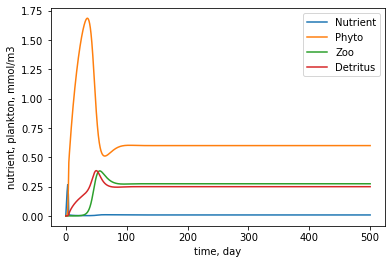

2.3153006065202932


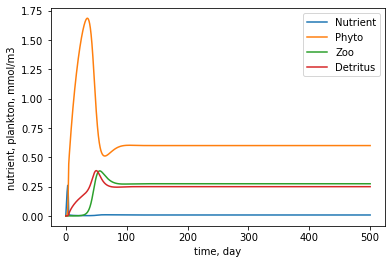

2.3900521061111824


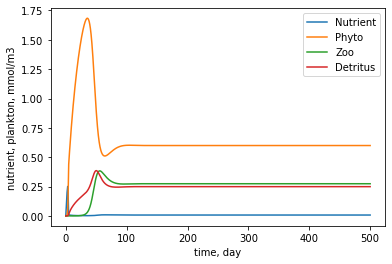

2.4982647437457497


In [45]:
count=0
nut_arr=np.zeros(np.size(Vmax))
phy_arr=np.zeros(np.size(Vmax))
zoo_arr=np.zeros(np.size(Vmax))
det_arr=np.zeros(np.size(Vmax))
photo_arr=np.zeros(np.size(Vmax))
for i in Vmax:
    def tendency(t,x,i,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink):
        nut=x[0]
        phy=x[1]
        zoo=x[2]
        det=x[3]
        dnutdt = -i*nut/(nut+K)*phy -c*(nut-Nth) + ld*det
        dphydt = i*nut/(nut+K)*phy - zoo*g*phy/Kp - lp*phy
        dzoodt = a*zoo*g*phy/Kp -lz*zoo
        ddetdt = lp*phy+lz*zoo+(1-a)*g*phy*zoo/Kp -ld*det-Wsink/hml*det
        phtsyn = i*nut/(nut+K)*phy
        out=np.array([dnutdt,dphydt,dzoodt,ddetdt,phtsyn])
        return out
    
    # define model_run function
    def model_run(trange,xinit,param,dt):
        # expand input
        i = param[0]
        K = param[1]
        Kp= param[2]
        a = param[3]
        g = param[4]
        lp= param[5]
        lz= param[6]
        ld= param[7]
        c = param[8]
        Nth= param[9]
        hml= param[10]
        Wsink=param[11]
        sol = solve_ivp(tendency,trange,xinit,args=(i,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink),method='RK45',max_step=dt)
        return sol
    
    # set time range
    trange = [0,500]
    # set parameters
    param=np.array([i,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink])
    # set initial conditions
    xinit = np.array([nuto,phyo,zooo,deto,photo])
    # time step size
    h = 1
    out = model_run(trange,xinit,param,h)
    
    # plot the output
    t_out = out.t
    vec_out = out.y
    N_out = vec_out[0,:]
    P_out = vec_out[1,:]
    Z_out = vec_out[2,:]
    D_out = vec_out[3,:]
    Ph_out = vec_out[4,:]
    #
    plt.plot(t_out,N_out,label='Nutrient')
    plt.plot(t_out,P_out,label='Phyto')
    plt.plot(t_out,Z_out,label='Zoo')
    plt.plot(t_out,D_out,label='Detritus')
    plt.legend()
    plt.xlabel('time, day')
    plt.ylabel('nutrient, plankton, mmol/m3')
    plt.show()
    
    print(i)
    
    nut_arr[count]=np.mean(N_out[-10:])
    phy_arr[count]=np.mean(P_out[-10:])
    zoo_arr[count]=np.mean(Z_out[-10:])
    det_arr[count]=np.mean(D_out[-10:])
    photo_arr[count]=np.mean(Ph_out[-10:])
    count=count+1
    

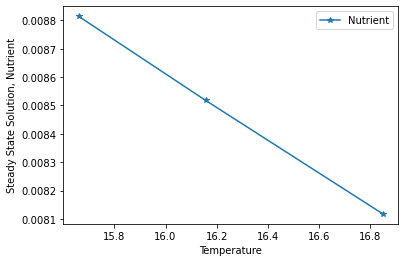

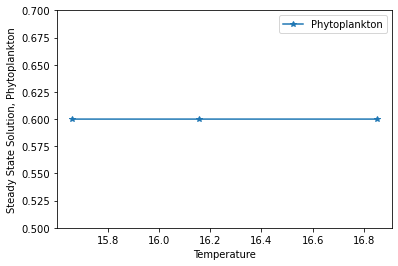

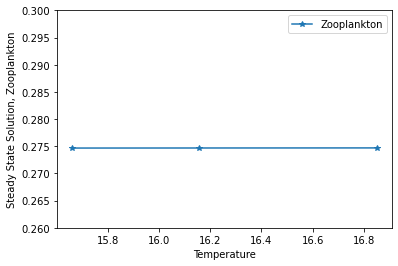

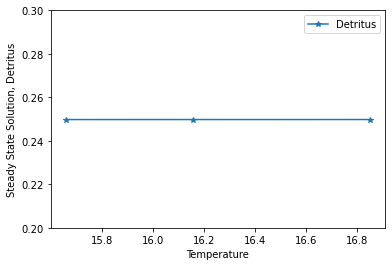

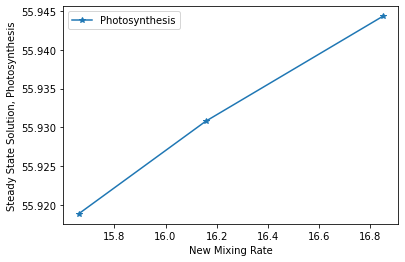

In [54]:
plt.plot(new_T,nut_arr, '*-', label='Nutrient')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Nutrient')
plt.show()

plt.plot(new_T,phy_arr, '*-', label='Phytoplankton')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Phytoplankton')
plt.ylim(0.5,0.7)
plt.show()

plt.plot(new_T,zoo_arr, '*-', label='Zooplankton')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Zooplankton')
plt.ylim(0.26,0.3)
plt.show()

plt.plot(new_T,det_arr, '*-', label='Detritus')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Detritus')
plt.ylim(0.2,0.3)
plt.show()

plt.plot(new_T,photo_arr, '*-', label='Photosynthesis')
plt.legend()
plt.xlabel('New Mixing Rate')
plt.ylabel('Steady State Solution, Photosynthesis')
plt.show()

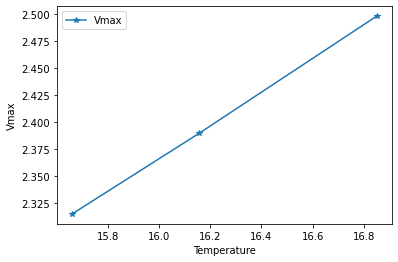

In [14]:
plt.plot(new_T,Vmax,'*-', label='Vmax')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Vmax')
plt.show()

In [15]:
#x-axis temperature, y-axis Vmax
#

In [16]:
#https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter12_FINAL.pdf
#"Depending on emissions scenario, 0.5-1.5 degrees C by end of century"
#Overall ranges from 1-3 degrees C

In [36]:
T_change = np.array([0.5, 1, 1.5, 2, 2.5, 3])
T_change = T_change + 16.1
# coefficients
h = 1 # timestep size
t = np.arange(0,360,h) # time in day
N = np.size(t) # dimension of time step
nuto = .001 # initial condition for nutrient
phyo = .001 # initial condition for phyto
zooo = .001 # initial condition for zoo
deto = .001
# set parameters
Vmax = 0.851*(1.066)**T_change # per day
K = 0.1 # mmol/m3
Kp= 2.8 # mmol/m3
a = 0.4
g = 1.4 # per day
lp = 0.05 # per day
lz = 0.12 # per day
ld = 0.05
c = 0.01 # per day
Nth = 10 # mmol/m3
Wsink = 20
hml = 50

Vmax

array([2.45866386, 2.53850346, 2.62093568, 2.70604469, 2.79391743,
       2.88464364])

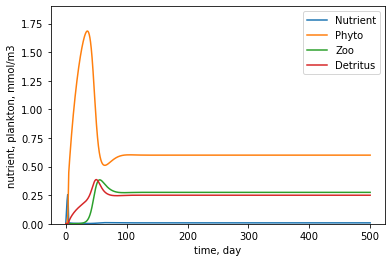

2.458663862189374


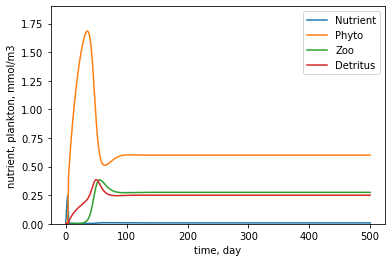

2.538503463537827


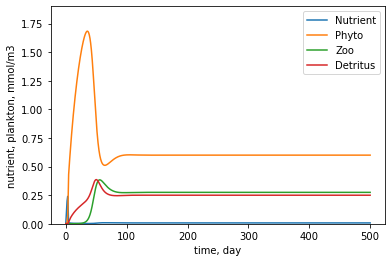

2.620935677093873


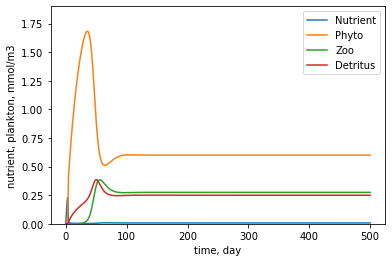

2.706044692131324


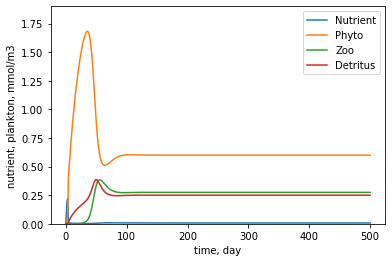

2.7939174317820687


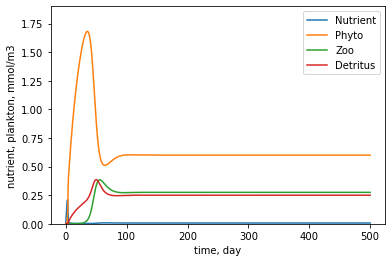

2.8846436418119916


In [39]:
count=0
nut_arr=np.zeros(np.size(Vmax))
phy_arr=np.zeros(np.size(Vmax))
zoo_arr=np.zeros(np.size(Vmax))
det_arr=np.zeros(np.size(Vmax))
photo_arr=np.zeros(np.size(Vmax))

for i in Vmax:
    def tendency(t,x,i,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink):
        nut=x[0]
        phy=x[1]
        zoo=x[2]
        det=x[3]
        dnutdt = -i*nut/(nut+K)*phy -c*(nut-Nth) + ld*det
        dphydt = i*nut/(nut+K)*phy - zoo*g*phy/Kp - lp*phy
        dzoodt = a*zoo*g*phy/Kp -lz*zoo
        ddetdt = lp*phy+lz*zoo+(1-a)*g*phy*zoo/Kp -ld*det-Wsink/hml*det
        phtsyn = i*nut/(nut+K)*phy
        out=np.array([dnutdt,dphydt,dzoodt,ddetdt,phtsyn])
        return out
    
    # define model_run function
    def model_run(trange,xinit,param,dt):
        # expand input
        i = param[0]
        K = param[1]
        Kp= param[2]
        a = param[3]
        g = param[4]
        lp= param[5]
        lz= param[6]
        ld= param[7]
        c = param[8]
        Nth= param[9]
        hml= param[10]
        Wsink=param[11]
        sol = solve_ivp(tendency,trange,xinit,args=(i,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink),method='RK45',max_step=dt)
        return sol
    
    # set time range
    trange = [0,500]
    # set parameters
    param=np.array([i,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink])
    # set initial conditions
    xinit = np.array([nuto,phyo,zooo,deto,photo])
    # time step size
    h = 1
    out = model_run(trange,xinit,param,h)
    
    # plot the output
    t_out = out.t
    vec_out = out.y
    N_out = vec_out[0,:]
    P_out = vec_out[1,:]
    Z_out = vec_out[2,:]
    D_out = vec_out[3,:]
    Ph_out = vec_out[4,:]
    #
    plt.plot(t_out,N_out,label='Nutrient')
    plt.plot(t_out,P_out,label='Phyto')
    plt.plot(t_out,Z_out,label='Zoo')
    plt.plot(t_out,D_out,label='Detritus')
    plt.legend()
    plt.xlabel('time, day')
    plt.ylabel('nutrient, plankton, mmol/m3')
    plt.ylim(0, 1.9)    
    plt.show()
    
    print(i) 
    
    nut_arr[count]=np.mean(N_out[-10:])
    phy_arr[count]=np.mean(P_out[-10:])
    zoo_arr[count]=np.mean(Z_out[-10:])
    det_arr[count]=np.mean(D_out[-10:])
    photo_arr[count]=np.mean(Ph_out[-10:])
    count=count+1
    

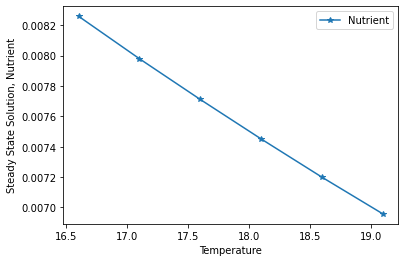

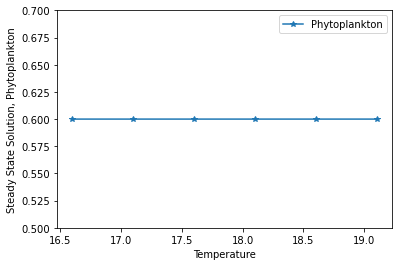

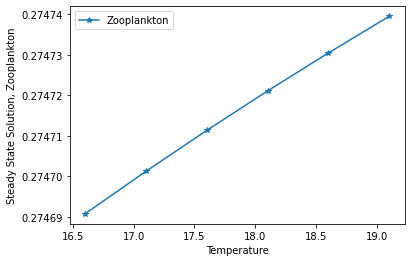

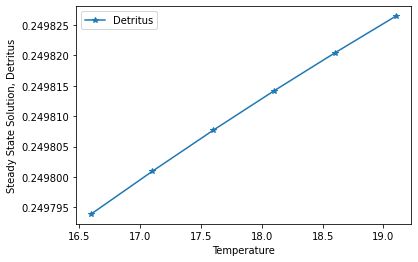

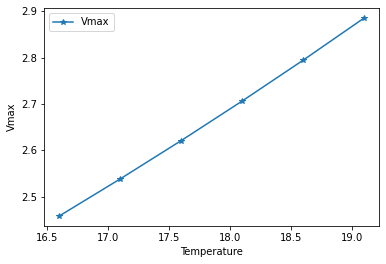

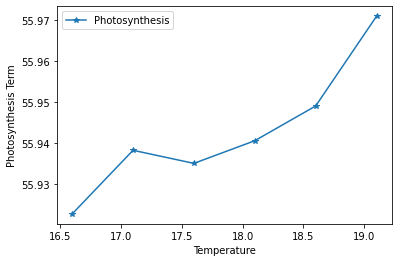

In [35]:
plt.plot(T_change,nut_arr, '*-', label='Nutrient')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Nutrient')
plt.show()

plt.plot(T_change,phy_arr, '*-', label='Phytoplankton')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Phytoplankton')
plt.ylim(0.5, 0.7)
plt.show()

plt.plot(T_change,zoo_arr, '*-', label='Zooplankton')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Zooplankton')
plt.show()

plt.plot(T_change,det_arr, '*-', label='Detritus')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Steady State Solution, Detritus')
plt.show()

plt.plot(T_change,Vmax,'*-', label='Vmax')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Vmax (mmol/m3/day)')
plt.show()

plt.plot(T_change,photo_arr, '*-', label='Photosynthesis')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Photosynthesis Term')
plt.show()